In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants as const

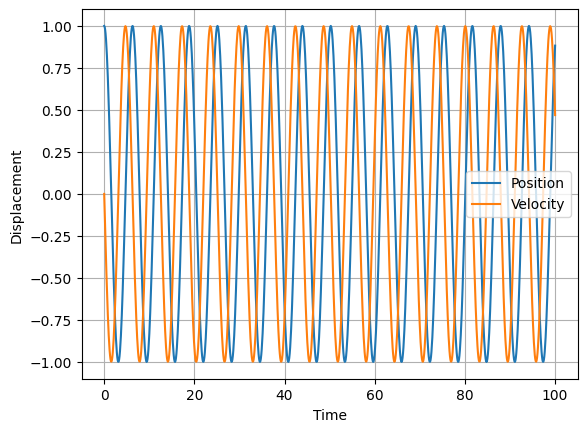

In [3]:
#Timestep
N = 1000 
t = np.linspace(0,100,N) 
dt = t[1]-t[0]

#Paramters
k = 1
m = 1
x0 = 1
v0 = 0
w = 1 #w = np.sqrt(k/m) = 1

#Modified Leapfrog Integrator
def integrator(x0, v0, w, N, dt): 
     x = np.zeros(N)
     v = np.zeros(N)

     #Initial positions
     x[0] = x0 
     v[0] = v0
     
     #Equations of Motion
     for i in range(N-1):
        v[i+1] = v[i] + x[i] * (-w**2) * 0.5 * dt
        x[i+1] = x[i] + v[i+1] * dt
        v[i+1] = v[i+1] + x[i+1] * (-w**2) * 0.5 * dt

     return x,v
     
x,v = integrator(x0, v0, w, N, dt)
     
plt.figure()
plt.plot(t, x, label = 'Position')
plt.plot(t, v, label = 'Velocity')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()
plt.grid()
plt.show()


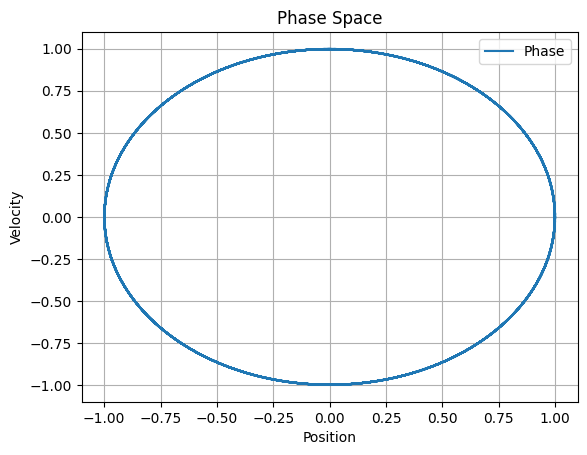

In [4]:
plt.figure()
plt.plot(x,v, label = "Phase")
plt.xlabel("Position")
plt.ylabel("Velocity")
plt.title('Phase Space')
plt.legend()
plt.grid()
plt.show()

In [5]:
#Energy using modified version
KE = 0.5 * m * v**2
PE = 0.5 * k * x**2
E = PE + KE

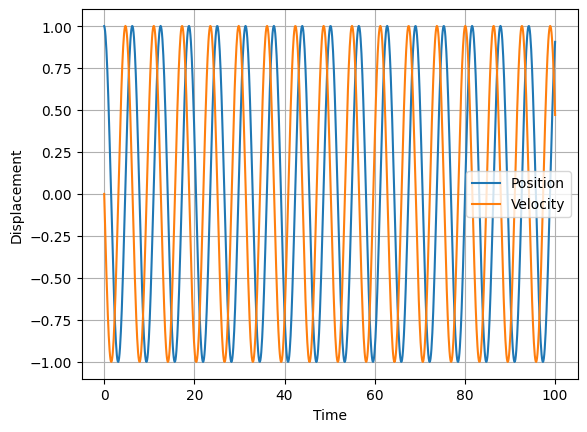

In [6]:
#Original Leapfrog Integrator
def integrator_original(x0, v0, w, N, dt): 
     x = np.zeros(N)
     v = np.zeros(N)

     #Initial positions
     x[0] = x0 
     v[0] = v0
     
     #Equaitons of Motion
     for i in range(N-1):
        v[i+1] = v[i] + x[i] * (-w**2) * dt
        x[i+1] = x[i] + v[i+1] * dt
        
     return x,v

x,v = integrator_original(x0, v0, w, N, dt)

plt.figure()
plt.plot(t, x, label = 'Position')
plt.plot(t, v, label = 'Velocity')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()
plt.grid()
plt.show()

In [7]:
E_original = 0.5 * m * v**2 + 0.5 * k * x**2

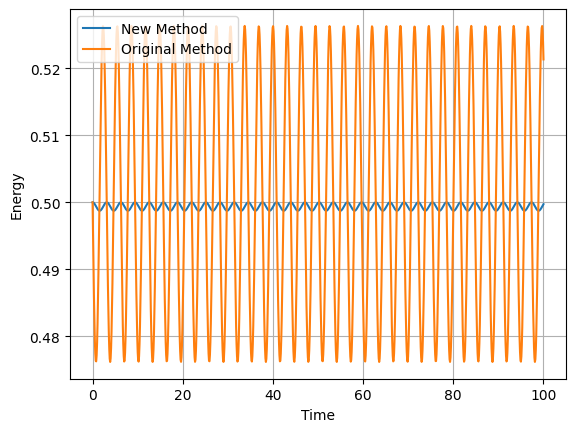

In [8]:
#Plot comparison of the two forms of Leapfrog Integration

plt.figure()
plt.plot(t, E, label = 'New Method')
plt.plot(t, E_original, label = 'Original Method')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend()
plt.grid()
plt.show()

# 2D Simple Harmonic Oscillator

In [9]:
import ipywidgets as wd
from mpl_toolkits.mplot3d import Axes3D

In [10]:
#Parameters

k_x = 1
k_y = 1
m = 1
x0 = 1
y0 = 1
v_x0 = 0
v_y0 = 0
w_x = 2 
w_y = 1

In [11]:
#2D Leapfrog Integrator
def integrator_2d(x0, y0, v_x0, v_y0, w_x, w_y, N, dt): 
     x = np.zeros(N)
     y = np.zeros(N)
     v_x = np.zeros(N)
     v_y = np.zeros(N)

     #Initial positions
     x[0] = x0 
     y[0] = y0
     v_x[0] = v_x0
     v_y[0] = v_y0

     #Equations of Motion
     for i in range(N-1):
         v_x[i+1] = v_x[i] + x[i] * (-w_x**2) * 0.5 * dt
         v_y[i+1] = v_y[i] + y[i] * (-w_y**2) * 0.5 * dt
         x[i+1] = x[i] + v_x[i+1] * dt
         y[i+1] = y[i] + v_y[i+1] * dt
         v_x[i+1] = v_x[i+1] + x[i+1] * (-w_x**2) * 0.5 * dt
         v_y[i+1] = v_y[i+1] + y[i+1] * (-w_y**2) * 0.5 * dt

     return x,y,v_x, v_y
     
x,y,v_x,v_y = integrator_2d(x0, y0, v_x0, v_y0, w_x, w_y, N, dt)


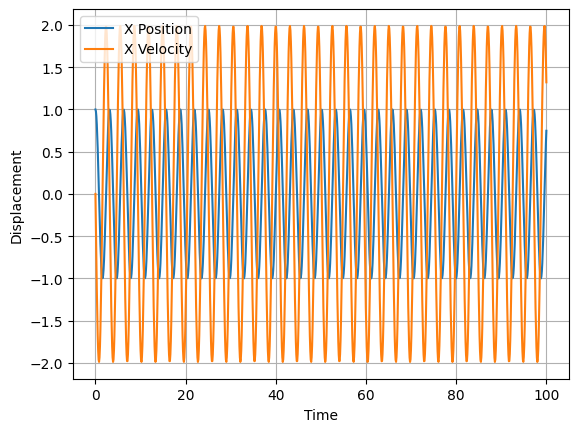

In [12]:
plt.figure()
plt.plot(t, x, label = 'X Position')
plt.plot(t, v_x, label = 'X Velocity')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()
plt.grid()
plt.show()

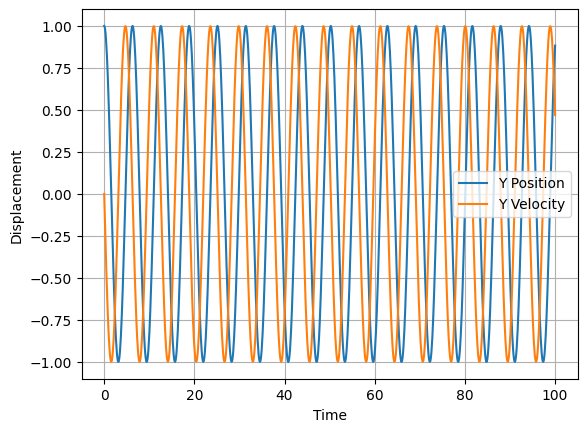

In [13]:
plt.figure()
plt.plot(t, y, label = 'Y Position')
plt.plot(t, v_y, label = 'Y Velocity')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()
plt.grid()
plt.show()

In [14]:
def my_cube_plot(x, y, v_x, v_y, t, w_x, w_y, my_azimuth, my_elevation):
    fig, ax = plt.subplots(
        subplot_kw={'projection': '3d'},
        figsize = (9, 9), 
        constrained_layout = True
        )
    
    ax.set_xlabel('Position')
    ax.set_ylabel('Velocity')
    ax.set_zlabel('Time')  

    ax.plot(x, v_x, t,
            color = 'Firebrick',
            marker = 'None',
            label = 'X Position and Velocity',
            linestyle = '--',
            linewidth = 3)
    
    ax.plot(y, v_y, t,
              color = 'b',
              label = 'Y Position and Velocity',
              linestyle = '--',
              linewidth = 3)

    ax.legend()
    ax.view_init(azim = my_azimuth, elev = my_elevation)
    
    plt.show()

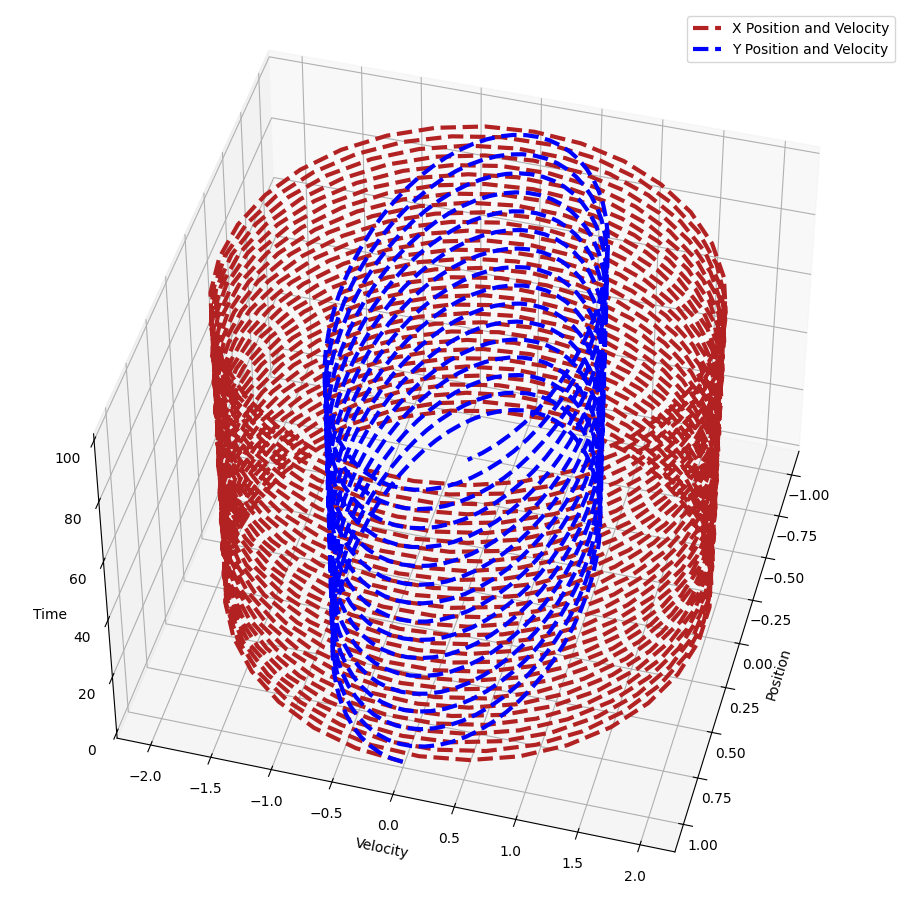

In [15]:
my_cube_plot(x, y, v_x, v_y, t, w_x, w_y, my_azimuth = 15, my_elevation = 45
)

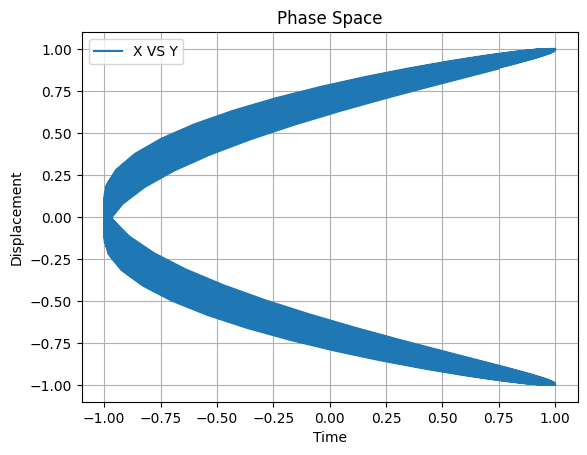

In [16]:
plt.figure()
plt.plot(x, y, label = 'X VS Y')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Phase Space')
plt.legend()
plt.grid()
plt.show()

In [17]:
#Energy
Energy = 0.5*m* ((v_x**2 + w_x**2 * x **2) + (v_y**2 + w_y**2 * y ** 2))

# Phase Diagram

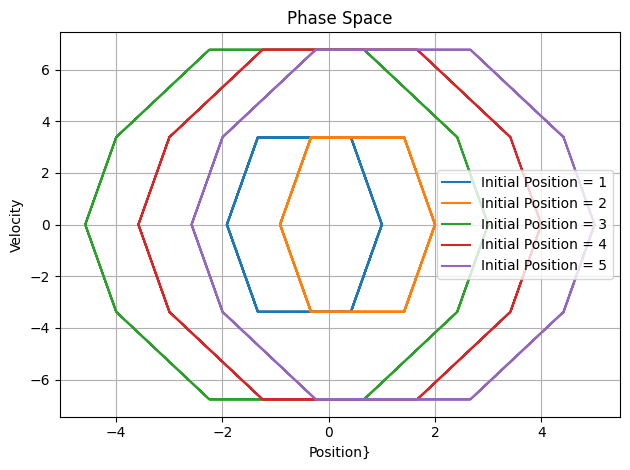

In [18]:
N = 30
t = np.linspace(0,10,N) 
dt = t[1]-t[0]

x0 = 1
v0 = 0

def force(x):
     return -const.g * np.sign(x)

def leapfrog(x0, v0, dt, N):
    x = np.zeros(N)
    v = np.zeros(N)

    x[0] = x0
    v[0] = v0

    for i in range (N-1):
       
         v[i+1] = v[i] + 0.5 * dt * force(x[i])
         x[i+1] = x[i] + dt * v[i+1]
         v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1])

    return x,v

positions = [1,2,3,4,5]

plt.figure()
for index, x0 in enumerate(positions):
     x, v = leapfrog(x0, v0, dt, N)
     plt.plot(x, v, label=f'Initial Position = {x0}')
plt.xlabel('Position}')
plt.ylabel('Velocity')
plt.title('Phase Space')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Solution Comparison

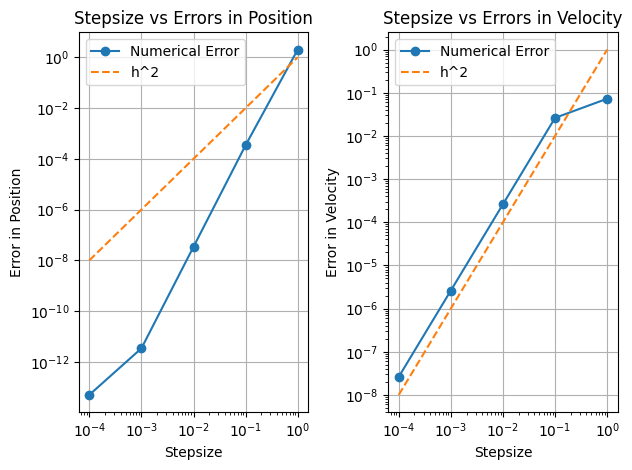

In [26]:
#Parameters
orbits = 10
stepsizes = [0.1, 1, 10]
x0 = 1
v0 = 0
w = 1
A = x0
T = 2 * np.pi/w # Time per orbit
t_final = orbits * T

   # Analytic
def analytic_solution(A, w, t):
    x_analytic = A * np.cos(w * t)
    v_analytic = -A * w * np.sin(w * t)

    return x_analytic, v_analytic

   #Numerical
def nuerical_solution(x0, v0, w, N, dt): 
    x = np.zeros(N)
    v = np.zeros(N)

    # Initial positions
    x[0] = x0 
    v[0] = v0

    # Equations of motion
    for i in range(N-1):
        v[i+1] = v[i] + x[i] * (-w**2) * 0.5 * dt
        x[i+1] = x[i] + v[i+1] * dt
        v[i+1] = v[i+1] + x[i+1] * (-w**2) * 0.5 * dt

    return x, v

#Step Size
stepsizes = [1e-4,1e-3,1e-2,1e-1,1]
errors_position = []
errors_velocity = []

for h in stepsizes:
    N = int(t_final / h) + 1
    t = np.linspace(0, t_final, N)
    dt = t[1] - t[0]

    x_analytic, v_analytic = analytic_solution(A, w, t)
    x_numerical, v_numerical = nuerical_solution(x0, v0, w, N, dt)

    # Error Calculation
    error_x = np.abs(x_numerical - x_analytic)[-1]
    error_v = np.abs(v_numerical - v_analytic)[-1]

    errors_position.append(error_x)
    errors_velocity.append(error_v)

#Position Plots
plt.figure()

plt.subplot(1,2,1)
plt.plot(stepsizes, errors_position, label = 'Numerical Error', marker = 'o')
plt.plot(stepsizes, np.array(stepsizes)**2, linestyle = 'dashed', label = 'h^2')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Stepsize")
plt.ylabel('Error in Position')
plt.title('Stepsize vs Errors in Position')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(stepsizes, errors_velocity, label = 'Numerical Error', marker = 'o')
plt.plot(stepsizes, np.array(stepsizes)**2, linestyle = 'dashed', label = 'h^2')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Stepsize")
plt.ylabel('Error in Velocity')
plt.title('Stepsize vs Errors in Velocity')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

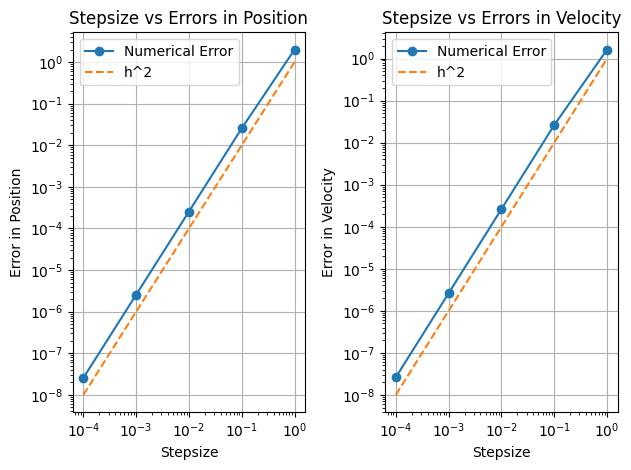

In [25]:
#Parameters
orbits = 10
stepsizes = [0.1, 1, 10]
x0 = 1
v0 = 0
w = 1
A = x0
T = 2 * np.pi/w # Time per orbit
t_final = orbits * T

   # Analytic
def analytic_solution(A, w, t):
    x_analytic = A * np.cos(w * t)
    v_analytic = -A * w * np.sin(w * t)

    return x_analytic, v_analytic

   #Numerical
def nuerical_solution(x0, v0, w, N, dt): 
    x = np.zeros(N)
    v = np.zeros(N)

    # Initial positions
    x[0] = x0 
    v[0] = v0

    # Equations of motion
    for i in range(N-1):
        v[i+1] = v[i] + x[i] * (-w**2) * 0.5 * dt
        x[i+1] = x[i] + v[i+1] * dt
        v[i+1] = v[i+1] + x[i+1] * (-w**2) * 0.5 * dt

    return x, v

#Step Size
stepsizes = [1e-4,1e-3,1e-2,1e-1,1]
errors_position = []
errors_velocity = []

for h in stepsizes:
    N = int(t_final / h) + 1
    t = np.linspace(0, t_final, N)
    dt = t[1] - t[0]

    x_analytic, v_analytic = analytic_solution(A, w, t)
    x_numerical, v_numerical = nuerical_solution(x0, v0, w, N, dt)

    # Error Calculation
    error_x = np.max(np.abs(x_numerical - x_analytic))
    error_v = np.max(np.abs(v_numerical - v_analytic))

    errors_position.append(error_x)
    errors_velocity.append(error_v)

#Position Plots
plt.figure()

plt.subplot(1,2,1)
plt.plot(stepsizes, errors_position, label = 'Numerical Error', marker = 'o')
plt.plot(stepsizes, np.array(stepsizes)**2, linestyle = 'dashed', label = 'h^2')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Stepsize")
plt.ylabel('Error in Position')
plt.title('Stepsize vs Errors in Position')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(stepsizes, errors_velocity, label = 'Numerical Error', marker = 'o')
plt.plot(stepsizes, np.array(stepsizes)**2, linestyle = 'dashed', label = 'h^2')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Stepsize")
plt.ylabel('Error in Velocity')
plt.title('Stepsize vs Errors in Velocity')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

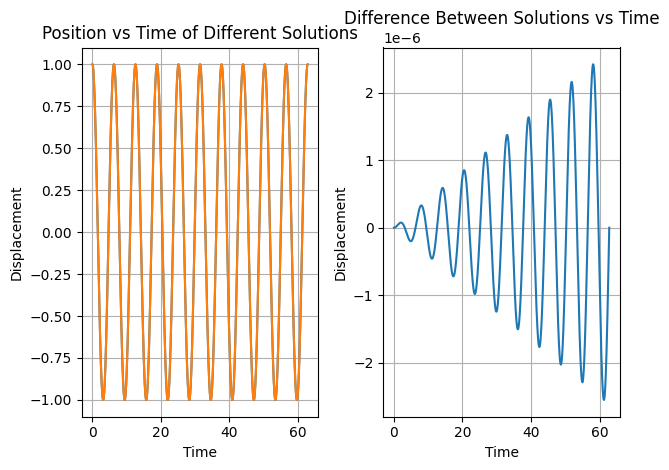

In [20]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(t, x_analytic, label = 'Analytic Position')
plt.plot(t, x_numerical, label = 'Numerical Position')
plt.xlabel("Time")
plt.ylabel('Displacement')
plt.title('Position vs Time of Different Solutions')
plt.grid()

plt.subplot(1,2,2)
plt.plot(t, x_analytic - x_numerical)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Difference Between Solutions vs Time')
plt.grid()

plt.tight_layout()
plt.show()

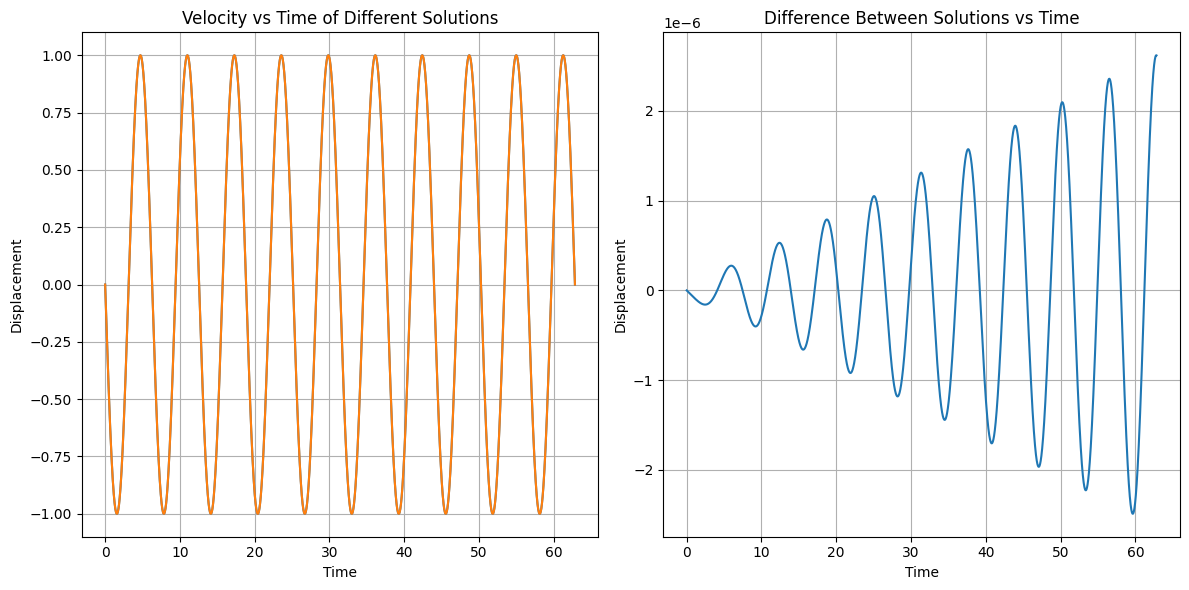

In [21]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.plot(t, v_analytic, label = 'Analytic Velocity')
plt.plot(t, v_numerical, label = 'Numerical Velocity')
plt.xlabel("Time")
plt.ylabel('Displacement')
plt.title('Velocity vs Time of Different Solutions')
plt.grid()

plt.subplot(1,2,2)
plt.plot(t, v_analytic - v_numerical)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Difference Between Solutions vs Time')
plt.grid()

plt.tight_layout()
plt.show()